## Trabalho Parcial de Classificação: Projeções Ortogonais da Disciplina de Algebra Linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob
from sklearn.model_selection import train_test_split as division

### Redimensionando o tamanho das imagens de 400x400 para 40x40

In [2]:
images = glob.glob('*/*/*.png')

for file in images:
    img = Image.open(file)
    width, height = img.size
    (new_width, new_height) = (40, 40)
    img = img.resize(
        (round(new_width),
        round(new_height)),
        Image.ANTIALIAS)
    img.save(file, format='png')

### Convertendo as imagens de RGB para níveis de cinza (monocromáticas)

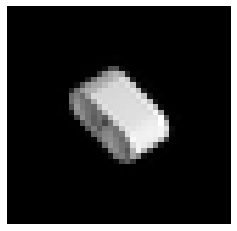

(40, 40)

In [8]:
for file in images:
    img = Image.open(file).convert('L')
    img.save(file, format='png')

images_array = np.asarray(glob.glob('*/*/*.png'))
teste = Image.open(images_array[0])
teste = np.asarray(teste, dtype=np.float32)/255

plt.figure(figsize=(4, 4))
im = plt.imshow(teste, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()
teste.shape

### Dividindo as imagens em treino e teste (80% treino e 20% teste) e compondo nossa matriz de dados de treino com os dados das imagens de treino

(32000, 1600)


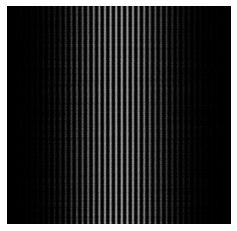

In [11]:
images_array = np.asarray(glob.glob('*/*/*.png'))
images_training, images_test = division(images_array, test_size=0.2, random_state=5)
data_matrix = Image.open(images_training[0])
data_matrix = np.asarray(data_matrix, dtype=np.float32)/255
data_matrix = np.reshape(data_matrix, (1, 1600))

for i in range(1, images_training.shape[0]):
        aux = Image.open(images_training[i])
        aux = np.asarray(aux, dtype=np.float32)/255
        aux = np.reshape(aux, (1, 1600))
        data_matrix = np.vstack((data_matrix, aux))

print(data_matrix.shape)
plt.figure(figsize=(4, 4))
im = plt.imshow(data_matrix, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()

### Centralizando os dados da nossa matriz de dados de treino md

In [12]:
data_matrix = data_matrix - np.mean(data_matrix)

### Calculando a covariancia

In [ ]:
cov = np.cov(data_matrix, rowvar=0)